In [52]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [53]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Vorbereitende Berechnungen

In [54]:
# Bei jedem Duchlauf immer die gleichen Zufallszahlen verwenden.
# Anm: So erhält man vergleichbare Ergebnisse.

np.random.seed(42)

x_stepwidth =  0.15
Size  of x  =  40
Shape of x  =  (40,)
Size  of yNoise =  40
Shape of Noise  =  (40,)


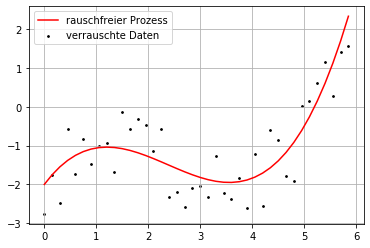

In [56]:
# Erzeugen eines verrauschten Datensatzes (x,yNoise)
# --------------------------------------------------

n      = 40 # Anzahl der Messpunkte
pp     = 2  # Rauschamplitude Peak-to-Peak
xStart = 0  
xStop  = 6

# Schrittweite der Messwerte in x-Richtung
x_stepwidth = (xStop-xStart)/n
print('x_stepwidth = ', x_stepwidth)

# Erzeugen des Zufallszahlen-Vektors für das
# Verrauschen des polynomalen Prozesses
rv    = pp*np.random.rand(n)-pp/2
# Erzeugen des x-Vektors
x     = np.arange(xStart, xStop, x_stepwidth)
print('Size  of x  = ', x.size)
print('Shape of x  = ', x.shape)

# Erzeugen des rauschfreien polynomalen Prozesses yTrue.
yTrue  = 0.14*x**3 -1.0*x**2 +1.8*x - 2
# Verrauschen des Prozesses
yNoise = rv + yTrue
print('Size  of yNoise = ', yNoise.size)
print('Shape of Noise  = ', yNoise.shape)

# Prozess und verrauschten Prozess anzeigen.
plt.scatter(x, yNoise, s=3,  color='black', label='verrauschte Daten')
plt.plot(   x, yTrue, 'red', label='rauschfreier Prozess')
plt.grid()
plt.legend(numpoints=None)

# Teilaufgabe 1:   Ausgleichsgerade y=ax+b berechnen

In [48]:
# Parameter a und b der Ausgleichsgerade yLin=ax+b berechnen
# -------------------------------------------------------
# 1. A-Matrix aufstellen
# 2. shape von Matrix A anzeigen und kontrollieren
# 3. Die Parameter pLin=[a,b] der Gerade durch Ausgleichung 
#   A_T * A * pLin = A_T * y_Noise bestimmen.

# Hier geht es los .........
z = np.ones(x.size)
A_T_lin = np.array([x, z])
A_lin = np.transpose(A_T_lin)
print('shape A =', A_lin.shape)

bT_lin = np.array([yNoise])
b_lin = np.transpose(bT_lin)

A_TA_lin = np.dot(A_T_lin, A_lin)
A_Tb_lin = np.dot(A_T_lin, b_lin)

x1_lin = np.linalg.solve(A_TA_lin, A_Tb_lin)

shape A = (40, 2)


In [49]:
# 1. Alle Punkte yLin der Ausgleichsgerade yLin=ax+b berechnen
# 2. shape der berechneten Punkte yLin ausgeben und kontrollieren 

# Hier geht es los .........
y_lin = x * x1_lin[0] + x1_lin[1]
np.allclose(np.dot(A_lin, x1_lin), y_lin)
print('shape y_lin =', y_lin.shape)

shape y_lin = (40,)


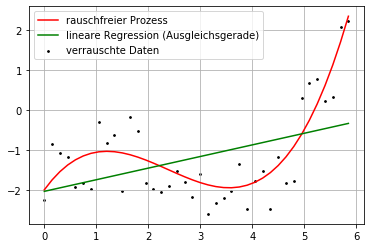

In [39]:
# Ergebnis mit Legende plotten
# a) verrauschte Daten (schwarz), 
# b) rauschfreier Prozess (rot) 
# c) Ausgleichsgerade yLin (grün)

# Hier geht es los .........
# Prozess und verrauschten Prozess anzeigen.
plt.scatter(x, yNoise, s=3,  color='black', label='verrauschte Daten')
plt.plot(   x, yTrue, 'red', label='rauschfreier Prozess')
plt.plot(x, y_lin, 'green', label ='lineare Regression (Ausgleichsgerade)')
plt.grid()
plt.legend(numpoints=None)

# Teilaufgabe 2:   Ausgleichspolynom 3. Grades berechnen 
(= Kubische Funktion)

In [40]:
# Die Parameter p3, p2, p1, p0 des Ausgleichspolynoms 
# yKub = p3*x**3 + p2*x**2 + p1*x + p0 berechnen
# -------------------------------------------------------
# 1. A-Matrix aufstellen
# 2. shape von Matrix A anzeigen und kontrollieren
# 3. Die Parameter pKub=[p3, p2, p1, p0] der Gerade durch Ausgleichung 
#   A_T * A * pKub = A_T * y_Noise bestimmen.

# Hier geht es los .........
z = np.ones(x.size)
x_2 = x * x
x_3 = x_2 * x

A_T_kub = np.array([x_3, x_2, x, z])
A_kub = np.transpose(A_T_kub)
print('shape A =', A_kub.shape)

bT_kub = np.array([yNoise])
b_kub = np.transpose(bT_kub)


A_TA_kub = np.dot(A_T_kub, A_kub)
A_Tb_kub = np.dot(A_T_kub, b_kub)

x1_kub = np.linalg.solve(A_TA_kub, A_Tb_kub)





shape A = (40, 4)


In [41]:
# 1. Alle Punkte yKub des Ausgleichspolynoms yKub = p3*x**3 + p2*x**2 + p1*x + p0 berechnen
# 2. shape der berechneten Punkte y ausgeben und kontrollieren 


# Hier geht es los .........
y_kub = x_3 * x1_kub[0]+ x_2 * x1_kub[1] + x * x1_kub[2] + x1_kub[3]

np.allclose(np.dot(A_kub, x1_kub), y_kub)

print('shape y_kub =', y_kub.shape)

shape y_kub = (40,)


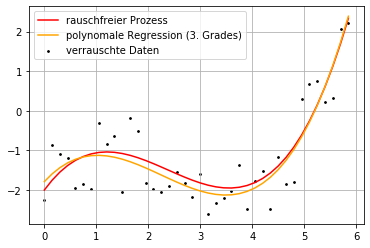

In [42]:
# Ergebnis mit Legende plotten
# a) verrauschte Daten (schwarz), 
# b) rauschfreier Prozess (rot) 
# c) Kub. Ausgleichspolynom (orange)

# Hier geht es los .........
plt.scatter(x, yNoise, s=3,  color='black', label='verrauschte Daten')
plt.plot(   x, yTrue, 'red', label='rauschfreier Prozess')
plt.plot(x, y_kub, 'orange', label ='polynomale Regression (3. Grades)')
plt.grid()
plt.legend(numpoints=None)

# Teilaufgabe 3:   Ausgleichspolynom 9. Grades berechnen 

In [43]:
# Parameter p9, p8, p7, .... p2, p1, p0 des Ausgleichspolynoms 
# yPoly = p9*x**9 + p8*x**8 +...... + p3*x**3 + p2*x**2 + p1*x + p0 berechnen
# ----------------------------------------------------------------------
# 1. A-Matrix aufstellen
# 2. shape von Matrix A anzeigen und kontrollieren
# 3. Die Parameter pPoly=[p9, p8, ..... p3, p2, p1, p0] des Polynoms durch Ausgleichung 
#   A_T * A * pPoly = A_T * y_Noise bestimmen.

# Hier geht es los .........
z = np.ones(x.size)
x_2 = x * x
x_3 = x_2 * x
x_4 = x_3 * x
x_5 = x_4 * x
x_6 = x_5 * x
x_7 = x_6 * x
x_8 = x_7 * x
x_9 = x_8 * x

A_T_9 = np.array([x_9, x_8, x_7, x_6, x_5, x_4, x_3, x_2, x, z])
A_9 = np.transpose(A_T_9)
print('shape A =', A_9.shape)

bT_9 = np.array([yNoise])
b_9 = np.transpose(bT_9)


A_TA_9 = np.dot(A_T_9, A_9)
A_Tb_9 = np.dot(A_T_9, b_9)

x1_9 = np.linalg.solve(A_TA_9, A_Tb_9)

shape A = (40, 10)


In [50]:
# Ausgleichspolynom 9-ten Gerades berechnen 
# 1. Alle Punkte yPoly des Ausgleichspolynoms 
#    yPoly = p9*x**3 + .... + p3*x**3 + p2*x**2 + p1*x + p0 berechnen
# 2. shape der berechneten Punkte yPoly ausgeben und kontrollieren 


# Hier geht es los .........
y_9 = x_9 * x1_9[0] + x_8 * x1_9[1] + x_7 * x1_9[2] + x_6 * x1_9[3] + x_5 * x1_9[4] + x_4 * x1_9[5] + x_3 * x1_9[6] + x_2 * x1_9[7] + x * x1_9[8] + x1_9[9] 
np.allclose(np.dot(A_9, x1_9), y_9)
print('shape y_9 =', y_9.shape)

shape y_9 = (40,)


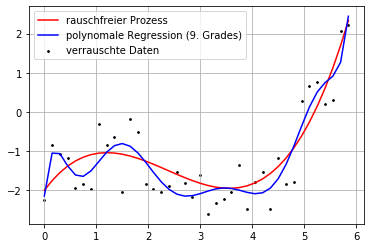

In [51]:
# Ergebnis mit Legende plotten
# a) verrauschte Daten (schwarz), 
# b) rauschfreier Prozess (rot) 
# c) Ausgleichspolynom 9. Grades (blau)

# Hier geht es los .........
plt.scatter(x, yNoise, s=3,  color='black', label='verrauschte Daten')
plt.plot(   x, yTrue, 'red', label='rauschfreier Prozess')
plt.plot(x, y_9, 'blue', label ='polynomale Regression (9. Grades)')
plt.grid()
plt.legend(numpoints=None)

In [32]:
# Liste der Variablen ausgeben
%whos 

Variable      Type       Data/Info
----------------------------------
A_9           ndarray    40x10: 400 elems, type `float64`, 3200 bytes
A_TA_9        ndarray    10x10: 100 elems, type `float64`, 800 bytes
A_TA_kub      ndarray    4x4: 16 elems, type `float64`, 128 bytes
A_TA_lin      ndarray    2x2: 4 elems, type `float64`, 32 bytes
A_T_9         ndarray    10x40: 400 elems, type `float64`, 3200 bytes
A_T_kub       ndarray    4x40: 160 elems, type `float64`, 1280 bytes
A_T_lin       ndarray    2x40: 80 elems, type `float64`, 640 bytes
A_Tb_9        ndarray    10x1: 10 elems, type `float64`, 80 bytes
A_Tb_kub      ndarray    4x1: 4 elems, type `float64`, 32 bytes
A_Tb_lin      ndarray    2x1: 2 elems, type `float64`, 16 bytes
A_kub         ndarray    40x4: 160 elems, type `float64`, 1280 bytes
A_lin         ndarray    40x2: 80 elems, type `float64`, 640 bytes
bT_9          ndarray    1x40: 40 elems, type `float64`, 320 bytes
bT_kub        ndarray    1x40: 40 elems, type `float64`, 3